## Project Luther

Welcome to my project notebook! I've tried to keep things organized.  
Please note that the cells in the Article Info scraping section are not meant to be run.  
Please start at section 1.4: "Importing and Cleaning the Data."

Written wholly in Python 3.6.3. Thanks for reading!

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Project-Luther" data-toc-modified-id="Project-Luther-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Project Luther</a></span><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-0.1.1"><span class="toc-item-num">0.1.1&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Project-Description-and-Data-Sources" data-toc-modified-id="Project-Description-and-Data-Sources-0.1.2"><span class="toc-item-num">0.1.2&nbsp;&nbsp;</span>Project Description and Data Sources</a></span><ul class="toc-item"><li><span><a href="#Ideas" data-toc-modified-id="Ideas-0.1.2.1"><span class="toc-item-num">0.1.2.1&nbsp;&nbsp;</span>Ideas</a></span></li><li><span><a href="#General-Wiki-page-Stats" data-toc-modified-id="General-Wiki-page-Stats-0.1.2.2"><span class="toc-item-num">0.1.2.2&nbsp;&nbsp;</span>General Wiki-page Stats</a></span></li></ul></li><li><span><a href="#Article-Info-scraping" data-toc-modified-id="Article-Info-scraping-0.1.3"><span class="toc-item-num">0.1.3&nbsp;&nbsp;</span>Article Info scraping</a></span></li><li><span><a href="#Importing-and-Cleaning-the-Data" data-toc-modified-id="Importing-and-Cleaning-the-Data-0.1.4"><span class="toc-item-num">0.1.4&nbsp;&nbsp;</span>Importing and Cleaning the Data</a></span></li><li><span><a href="#Exploratory-Data-analysis-and-First-Round-Modeling" data-toc-modified-id="Exploratory-Data-analysis-and-First-Round-Modeling-0.1.5"><span class="toc-item-num">0.1.5&nbsp;&nbsp;</span>Exploratory Data analysis and First-Round Modeling</a></span><ul class="toc-item"><li><span><a href="#Descriptives" data-toc-modified-id="Descriptives-0.1.5.1"><span class="toc-item-num">0.1.5.1&nbsp;&nbsp;</span>Descriptives</a></span></li><li><span><a href="#Normalization" data-toc-modified-id="Normalization-0.1.5.2"><span class="toc-item-num">0.1.5.2&nbsp;&nbsp;</span>Normalization</a></span></li><li><span><a href="#Correlations" data-toc-modified-id="Correlations-0.1.5.3"><span class="toc-item-num">0.1.5.3&nbsp;&nbsp;</span>Correlations</a></span></li><li><span><a href="#A-preliminary-model" data-toc-modified-id="A-preliminary-model-0.1.5.4"><span class="toc-item-num">0.1.5.4&nbsp;&nbsp;</span>A preliminary model</a></span></li></ul></li><li><span><a href="#Feature-selection,-feature-engineering,-and-more-models" data-toc-modified-id="Feature-selection,-feature-engineering,-and-more-models-0.1.6"><span class="toc-item-num">0.1.6&nbsp;&nbsp;</span>Feature selection, feature engineering, and more models</a></span><ul class="toc-item"><li><span><a href="#Manual-feature-selection-approach" data-toc-modified-id="Manual-feature-selection-approach-0.1.6.1"><span class="toc-item-num">0.1.6.1&nbsp;&nbsp;</span>Manual feature selection approach</a></span></li><li><span><a href="#Train-Test-Split" data-toc-modified-id="Train-Test-Split-0.1.6.2"><span class="toc-item-num">0.1.6.2&nbsp;&nbsp;</span>Train-Test Split</a></span></li><li><span><a href="#Polynomial-features-pipeline" data-toc-modified-id="Polynomial-features-pipeline-0.1.6.3"><span class="toc-item-num">0.1.6.3&nbsp;&nbsp;</span>Polynomial features pipeline</a></span></li><li><span><a href="#10-fold-cross-validation" data-toc-modified-id="10-fold-cross-validation-0.1.6.4"><span class="toc-item-num">0.1.6.4&nbsp;&nbsp;</span>10-fold cross-validation</a></span></li><li><span><a href="#Cross-validation-with-Lasso-Regularization" data-toc-modified-id="Cross-validation-with-Lasso-Regularization-0.1.6.5"><span class="toc-item-num">0.1.6.5&nbsp;&nbsp;</span>Cross-validation with Lasso Regularization</a></span></li></ul></li><li><span><a href="#Assumption-Testing" data-toc-modified-id="Assumption-Testing-0.1.7"><span class="toc-item-num">0.1.7&nbsp;&nbsp;</span>Assumption Testing</a></span><ul class="toc-item"><li><span><a href="#Assumption-One:-Plotting-Residuals" data-toc-modified-id="Assumption-One:-Plotting-Residuals-0.1.7.1"><span class="toc-item-num">0.1.7.1&nbsp;&nbsp;</span>Assumption One: Plotting Residuals</a></span></li><li><span><a href="#Other-assumptions:" data-toc-modified-id="Other-assumptions:-0.1.7.2"><span class="toc-item-num">0.1.7.2&nbsp;&nbsp;</span>Other assumptions:</a></span></li></ul></li><li><span><a href="#Appendix:-Graveyard-of-failed-creations" data-toc-modified-id="Appendix:-Graveyard-of-failed-creations-0.1.8"><span class="toc-item-num">0.1.8&nbsp;&nbsp;</span>Appendix: Graveyard of failed creations</a></span><ul class="toc-item"><li><span><a href="#Plotting" data-toc-modified-id="Plotting-0.1.8.1"><span class="toc-item-num">0.1.8.1&nbsp;&nbsp;</span>Plotting</a></span></li></ul></li></ul></li></ul></li></ul></div>

### Setup

In [1]:
import warnings
# so we don't get all the deprecation warnings
warnings.filterwarnings("ignore")

from datetime import datetime

import pandas as pd
import numpy as np

from scipy import stats
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LassoCV, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_validation import KFold, cross_val_score

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def ends(df,n_rows=5):
    return pd.concat([df.head(n_rows) ,df.tail(n_rows)])

### Project Description and Data Sources

#### Ideas

Can we predict the current popularity (pageviews in last 30 days) of wikipedia articles with:

- Page size (in bytes)
- Length of article
- Number of page watchers
- Total number of edits on an article
- Number of redirects to this article
- Article age (time since creation date, with now = 1/24/18)
- Time since last edit
- Number of editors/authors last 30 days

I would have loved to get these three features, but they proved too difficult to scrape for the present project:
- article quality as assessed by wikipedia
- whether the article was featured on main page
- number of links to this article from all other articles

I had to eliminate the following feature:
- Number of redirects to this articles

Why would I want to ask this question?
- As someone who uses wikipedia a lot, it's kind of interesting to me.
- Wikipedia is probably interested in knowing what makes certain articles more popular than others. 

Future avenues:
- See how news cycle stuff predicts wikipedia article popularity

#### General Wiki-page Stats
https://en.wikipedia.org/w/index.php?title=article_name&action=info

See more below in the web-scraping section

```python
        article_title =\
         response.xpath('//*[@id="mw-pageinfo-display-title"]/td[2]//text()').extract_first()

        page_size =\
         response.xpath('//*[@id="mw-pageinfo-length"]/td[2]/text()').extract_first()

        num_watchers =\
         response.xpath('//*[@id="mw-pageinfo-watchers"]/td[2]/text()').extract_first()

        num_edits =\
         response.xpath('//*[@id="mw-pageinfo-edits"]/td[2]/text()').extract_first()

         # this one is isn't behaving right
        num_redirects =\
         response.xpath('//*[@id="mw-content-text"]/table[1]/tr[10]/td[2]/text()').extract_first()

        creation_date =\
         response.xpath('//*[@id="mw-pageinfo-firsttime"]/td[2]/a/text()').extract_first()

        last_edit_date =\
         response.xpath('//*[@id="mw-pageinfo-lasttime"]/td[2]/a/text()').extract_first()

        authors_in_last30 =\
         response.xpath('//*[@id="mw-pageinfo-recent-authors"]/td[2]/text()').extract_first()

        # target:
        page_views_last30 =\
         response.xpath("//div[@class='mw-pvi-month']/text()").extract_first()
```

### Article Info scraping

Plan of attack:  
We can just use the 'requests' python library, with a little bit of regex, 
to get our article urls.

In [ ]:
import requests
import re

In [ ]:
wiki = requests.get('https://en.wikipedia.org/wiki/Special:Random')

The next cell takes a long time to run. Run with care! Returns something new every time.

In [ ]:
urls = []
for i in range(1,1001):
    wiki_url = requests.get('https://en.wikipedia.org/wiki/Special:Random').url
    urls.append(wiki_url)

print(urls[0:5])

In [ ]:
article_names = [re.findall(r'wiki/(.+)$',url)[0] for url in urls]

article_names[0:5] # Cool, that's what I wanted

In [ ]:
import pickle
# to save an object as a pickle file:
pickle.dump(article_names, open('article_names.p', 'wb'))

In [ ]:
# # Jon's first scrapy script!!

# import scrapy
# import pickle

# # there are 1000 article names here - I want to scrape each page...
# article_names = pickle.load(open('article_names.p', 'rb'))


# class WikiSpider(scrapy.Spider):
#     name = 'wiki_scraper'
#     start_urls = ['https://en.wikipedia.org/w/index.php?title='+article_name+'&action=info' for article_name in article_names]
#     custom_settings = {
#         "DOWNLOAD_DELAY": 3,
#         "CONCURENT_REQUESTS_PER_DOMAIN": 3,
#         "HTTPCACHE_ENABLED": True,
#         "ROBOTSTXT_OBEY" : False
#     }

#     def parse(self, response):
#         # features:
#         article_title =\
#          response.xpath('//*[@id="mw-pageinfo-display-title"]/td[2]//text()').extract_first()

#         page_size =\
#          response.xpath('//*[@id="mw-pageinfo-length"]/td[2]/text()').extract_first()

#         num_watchers =\
#          response.xpath('//*[@id="mw-pageinfo-watchers"]/td[2]/text()').extract_first()

#         num_edits =\
#          response.xpath('//*[@id="mw-pageinfo-edits"]/td[2]/text()').extract_first()

#          # this one is isn't behaving right
#         num_redirects =\
#          response.xpath('//*[@id="mw-content-text"]/table[1]/tr[10]/td[2]/text()').extract_first()

#         creation_date =\
#          response.xpath('//*[@id="mw-pageinfo-firsttime"]/td[2]/a/text()').extract_first()

#         last_edit_date =\
#          response.xpath('//*[@id="mw-pageinfo-lasttime"]/td[2]/a/text()').extract_first()

#         authors_in_last30 =\
#          response.xpath('//*[@id="mw-pageinfo-recent-authors"]/td[2]/text()').extract_first()

#         # target:
#         page_views_last30 =\
#          response.xpath("//div[@class='mw-pvi-month']/text()").extract_first()

#         yield {
#             'article_title' : article_title,
#             'page_size' : page_size,
#             'num_watchers' : num_watchers,
#             'num_edits' : num_edits,
#             'num_redirects' : num_redirects,
#             'creation_date' : creation_date,
#             'last_edit_date' : last_edit_date,
#             'authors_in_last30' : authors_in_last30,
#             'page_views_last30' : page_views_last30
#             }


### Importing and Cleaning the Data

In [3]:
raw = pd.read_csv('wiki.csv')

In [4]:
ends(raw,5)

,article_title,page_size,num_watchers,num_edits,num_redirects,creation_date,last_edit_date,authors_in_last30,page_views_last30
0,La Seine no Hoshi,"3,853",Fewer than 30 watchers,67,Yes,"16:26, 19 June 2005","13:50, 20 January 2018",1,577
1,Gary Keating,"4,391",Fewer than 30 watchers,18,Yes,"20:05, 23 September 2014","20:26, 28 August 2017",0,50
2,Colton's Crossing Bridge,"2,472",Fewer than 30 watchers,18,Yes,"16:58, 14 July 2012","02:15, 15 October 2017",0,42
3,Philippe Echaroux,"7,418",Fewer than 30 watchers,36,Yes,"01:07, 1 December 2016","09:10, 1 July 2017",0,163
4,Reverence,"4,826",Fewer than 30 watchers,11,Yes,"17:43, 6 September 2013","06:26, 16 January 2016",0,135
995,"Belica, Osilnica","4,644",Fewer than 30 watchers,13,Yes,"10:20, 11 March 2010","06:10, 13 March 2017",0,26
996,Béguédo Department,"3,754",Fewer than 30 watchers,19,Yes,"18:25, 11 April 2008","04:54, 28 July 2017",0,49
997,Eddie Marsh (bishop),976,Fewer than 30 watchers,8,Yes,"19:44, 1 September 2015","15:49, 7 June 2017",0,28
998,20D/Westphal,"2,662",Fewer than 30 watchers,40,Yes,"11:39, 9 June 2006","15:04, 27 October 2017",0,460
999,Franz Ludwig von Cancrin,"5,051",Fewer than 30 watchers,50,Yes,"19:58, 6 July 2005","17:59, 15 July 2016",0,68


Ok, the data is pretty clean, but let's see what we can clean further.

In [5]:
# First, let's change those column names
raw = raw.rename(index=str, columns={"article_title": "Title",
                              "page_size":"Page Size",
                              "num_watchers":"Watchers",
                              "num_redirects": "Redirect Count",
                              "num_edits":"Edit Count",
                              "creation_date":"Creation Date",
                              "last_edit_date": "Last Edit Date",
                              "authors_in_last30":"Recent Authors"})

# We can make a Title Length column!
raw["Title Length"] = raw["Title"].str.len()

## Bin Watchers into categories.
raw['Watchers'] = raw['Watchers'].replace(r'^\d{2}$','30 to 99 watchers', regex = True)
raw['Watchers'] = raw['Watchers'].replace(r'^\d{3}$','100+ watchers', regex = True)

## scrape quality or get article quality somehow
### might not be enough time. will do if everything else is done first
ends(raw,3)

,Title,Page Size,Watchers,Edit Count,Redirect Count,Creation Date,Last Edit Date,Recent Authors,page_views_last30,Title Length
0,La Seine no Hoshi,"3,853",Fewer than 30 watchers,67,Yes,"16:26, 19 June 2005","13:50, 20 January 2018",1,577,17
1,Gary Keating,"4,391",Fewer than 30 watchers,18,Yes,"20:05, 23 September 2014","20:26, 28 August 2017",0,50,12
2,Colton's Crossing Bridge,"2,472",Fewer than 30 watchers,18,Yes,"16:58, 14 July 2012","02:15, 15 October 2017",0,42,24
997,Eddie Marsh (bishop),976,Fewer than 30 watchers,8,Yes,"19:44, 1 September 2015","15:49, 7 June 2017",0,28,20
998,20D/Westphal,"2,662",Fewer than 30 watchers,40,Yes,"11:39, 9 June 2006","15:04, 27 October 2017",0,460,12
999,Franz Ludwig von Cancrin,"5,051",Fewer than 30 watchers,50,Yes,"19:58, 6 July 2005","17:59, 15 July 2016",0,68,24


In [6]:
# Looks like Redirect Count isn't working, we'll delete for now. Will try and fix if time.
try:
    del raw['Redirect Count']
except:
    print("Already deleted column.")
    

In [78]:
ends(raw,7)

,Title,Page Size,Watchers,Edit Count,Creation Date,Last Edit Date,Recent Authors,page_views_last30,Title Length
0,La Seine no Hoshi,"3,853",Fewer than 30 watchers,67,"16:26, 19 June 2005","13:50, 20 January 2018",1,577,17
1,Gary Keating,"4,391",Fewer than 30 watchers,18,"20:05, 23 September 2014","20:26, 28 August 2017",0,50,12
2,Colton's Crossing Bridge,"2,472",Fewer than 30 watchers,18,"16:58, 14 July 2012","02:15, 15 October 2017",0,42,24
3,Philippe Echaroux,"7,418",Fewer than 30 watchers,36,"01:07, 1 December 2016","09:10, 1 July 2017",0,163,17
4,Reverence,"4,826",Fewer than 30 watchers,11,"17:43, 6 September 2013","06:26, 16 January 2016",0,135,9
5,Surpura,495,Fewer than 30 watchers,8,"07:05, 8 July 2014","23:17, 12 February 2016",0,52,7
6,Dorymyrmex joergenseni,799,Fewer than 30 watchers,2,"16:47, 23 January 2015","10:05, 2 April 2015",0,25,22
993,Grandmothers of the Plaza de Mayo,"14,061",Fewer than 30 watchers,132,"01:07, 18 December 2003","23:38, 10 December 2017",0,999,33
994,"Harry Dalzell, 10th Earl of Carnwath","1,929",Fewer than 30 watchers,10,"08:05, 21 October 2013","23:25, 11 May 2017",0,44,36
995,"Belica, Osilnica","4,644",Fewer than 30 watchers,13,"10:20, 11 March 2010","06:10, 13 March 2017",0,26,16


In [7]:
# we're going to want to make dummies of the watchers, because it's a mixed type. Dang!
raw2 = raw.join(pd.get_dummies(raw['Watchers']))
del raw2['Fewer than 30 watchers']
del raw2['Watchers']

ends(raw2,5) # sanity check

,Title,Page Size,Edit Count,Creation Date,Last Edit Date,Recent Authors,page_views_last30,Title Length,100+ watchers,30 to 99 watchers
0,La Seine no Hoshi,"3,853",67,"16:26, 19 June 2005","13:50, 20 January 2018",1,577,17,0,0
1,Gary Keating,"4,391",18,"20:05, 23 September 2014","20:26, 28 August 2017",0,50,12,0,0
2,Colton's Crossing Bridge,"2,472",18,"16:58, 14 July 2012","02:15, 15 October 2017",0,42,24,0,0
3,Philippe Echaroux,"7,418",36,"01:07, 1 December 2016","09:10, 1 July 2017",0,163,17,0,0
4,Reverence,"4,826",11,"17:43, 6 September 2013","06:26, 16 January 2016",0,135,9,0,0
995,"Belica, Osilnica","4,644",13,"10:20, 11 March 2010","06:10, 13 March 2017",0,26,16,0,0
996,Béguédo Department,"3,754",19,"18:25, 11 April 2008","04:54, 28 July 2017",0,49,18,0,0
997,Eddie Marsh (bishop),976,8,"19:44, 1 September 2015","15:49, 7 June 2017",0,28,20,0,0
998,20D/Westphal,"2,662",40,"11:39, 9 June 2006","15:04, 27 October 2017",0,460,12,0,0
999,Franz Ludwig von Cancrin,"5,051",50,"19:58, 6 July 2005","17:59, 15 July 2016",0,68,24,0,0


In [8]:
articles = raw2 # ok, I'm comfortable switching over form raw now

print(articles.dtypes) # let's see if our data types are behaving!

Title                object
Page Size            object
Edit Count           object
Creation Date        object
Last Edit Date       object
Recent Authors        int64
page_views_last30    object
Title Length          int64
100+ watchers         uint8
30 to 99 watchers     uint8
dtype: object


In [9]:
# Some data reformatting and cleaning
articles = articles.dropna()

## Changes our page size and edit counts to numeric, after removing commas
articles["Page Size"] = pd.to_numeric(raw["Page Size"].replace({r',':''}, regex = True))
articles["Edit Count"] = pd.to_numeric(raw["Edit Count"].replace({r',':''}, regex = True))
articles["page_views_last30"] = pd.to_numeric(raw["page_views_last30"].replace({r',':''}, regex = True))

articles["Page Size"] = articles["Page Size"].astype(int)
articles["page_views_last30"] = articles["page_views_last30"].astype(int)

## Change these time strings into datetimes
articles["Creation Date"] = pd.to_datetime(raw["Creation Date"])
articles["Last Edit Date"] = pd.to_datetime(raw["Last Edit Date"])

## We want the above as days from present (for our purposes, present will be UTC Jan 23 at 9:15pm)
now = datetime(2018, 1, 23, 21, 15, 14, 24917)
articles["Article Age"] = (now - articles['Creation Date']).dt.days
articles["Days Since Last Edit"] = (now - articles['Last Edit Date']).dt.days

In [10]:
print(articles.dtypes) # let's see if our data types are behaving!
# excellent

Title                           object
Page Size                        int64
Edit Count                       int64
Creation Date           datetime64[ns]
Last Edit Date          datetime64[ns]
Recent Authors                   int64
page_views_last30                int64
Title Length                     int64
100+ watchers                    uint8
30 to 99 watchers                uint8
Article Age                      int64
Days Since Last Edit             int64
dtype: object


### Exploratory Data analysis and First-Round Modeling

In [11]:
num_only = articles[["Title Length",
              "Page Size",
              "Edit Count",
              "Recent Authors",
              "30 to 99 watchers",
              "100+ watchers",
              "Article Age",
              "Days Since Last Edit",
              "page_views_last30"]]

ends(num_only) # sanity check

,Title Length,Page Size,Edit Count,Recent Authors,30 to 99 watchers,100+ watchers,Article Age,Days Since Last Edit,page_views_last30
0,17,3853,67,1,0,0,4601,3,577
1,12,4391,18,0,0,0,1218,148,50
2,24,2472,18,0,0,0,2019,100,42
3,17,7418,36,0,0,0,418,206,163
4,9,4826,11,0,0,0,1600,738,135
995,16,4644,13,0,0,0,2875,316,26
996,18,3754,19,0,0,0,3574,179,49
997,20,976,8,0,0,0,875,230,28
998,12,2662,40,0,0,0,4246,88,460
999,24,5051,50,0,0,0,4584,557,68


#### Descriptives

In [12]:
print(f"We have {len(num_only.columns)-1} features to predict our target")
num_only.describe()

We have 8 features to predict our target


,Title Length,Page Size,Edit Count,Recent Authors,30 to 99 watchers,100+ watchers,Article Age,Days Since Last Edit,page_views_last30
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,19.233233,7499.142142,94.548549,0.397397,0.029029,0.010010,2837.906907,217.468468,1272.015015
std,10.468612,12978.110256,272.062731,1.388196,0.167972,0.099598,1428.880006,288.945583,7201.886062
min,1.000000,231.000000,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000,10.000000
25%,12.000000,1907.000000,14.000000,0.000000,0.000000,0.000000,1618.000000,42.000000,47.000000
50%,16.000000,3631.000000,30.000000,0.000000,0.000000,0.000000,3060.000000,128.000000,96.000000
75%,24.000000,7434.000000,69.500000,0.000000,0.000000,0.000000,4006.500000,282.000000,395.000000
max,83.000000,170306.000000,3467.000000,24.000000,1.000000,1.000000,5959.000000,2447.000000,143365.000000


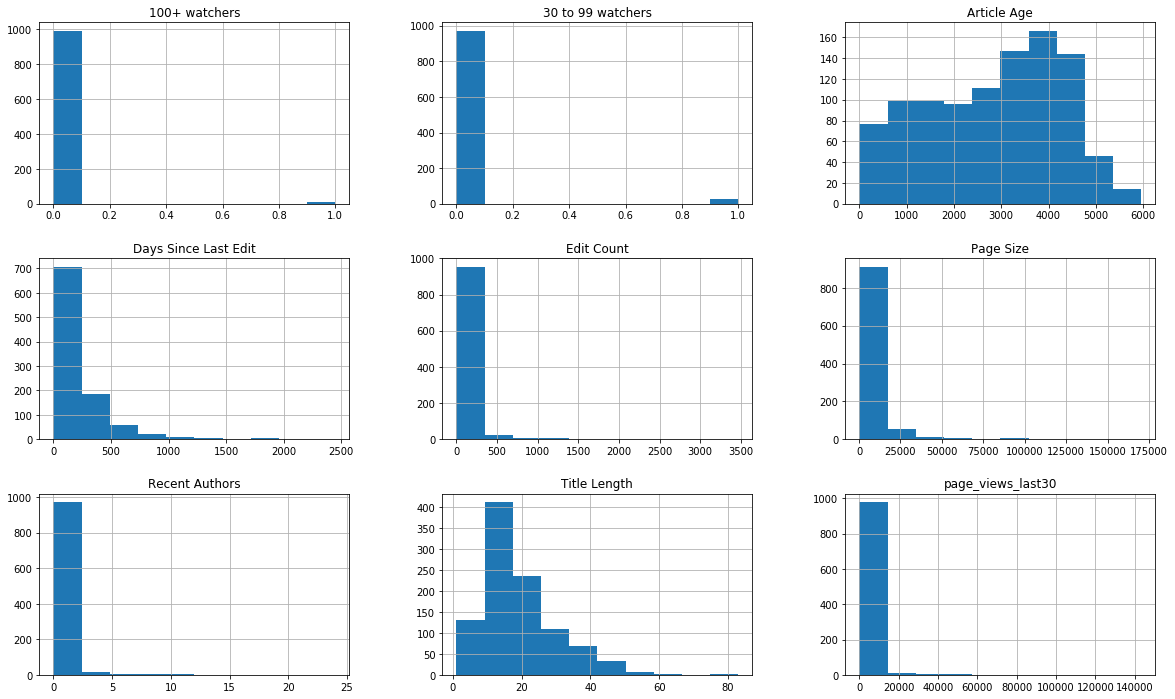

In [13]:
# Let's check to see how our variables are distributed
num_only.hist(figsize = (20,12));

Our variables aren't normal. Let's change that.

#### Normalization

In [14]:
# Normalizing
df_trans = preprocessing.normalize(num_only,axis=0)

# turn back in DF
df_trans = pd.DataFrame(df_trans,columns=num_only.columns)

y_trans=df_trans.iloc[:,-1]
X_trans=df_trans.iloc[:,:-1]

In [15]:
ends(y_trans,3)

0      0.002497
1      0.000216
2      0.000182
996    0.000121
997    0.001991
998    0.000294
Name: page_views_last30, dtype: float64

In [16]:
ends(X_trans,3)

,Title Length,Page Size,Edit Count,Recent Authors,30 to 99 watchers,100+ watchers,Article Age,Days Since Last Edit
0,0.024565,0.008136,0.007363,0.021921,0.0,0.0,0.045820,0.000263
1,0.017340,0.009272,0.001978,0.000000,0.0,0.0,0.012130,0.012952
2,0.034680,0.005220,0.001978,0.000000,0.0,0.0,0.020106,0.008751
996,0.028900,0.002061,0.000879,0.000000,0.0,0.0,0.008714,0.020128
997,0.017340,0.005621,0.004396,0.000000,0.0,0.0,0.042284,0.007701
998,0.034680,0.010666,0.005495,0.000000,0.0,0.0,0.045650,0.048746


In [17]:
# Box-cox
num_only2 = df_trans[["Title Length",
              "Page Size",
              "Edit Count",
              "Recent Authors",
              "30 to 99 watchers",
              "100+ watchers",
              "Article Age",
              "Days Since Last Edit",
              "page_views_last30"]]

for column in num_only2.columns: # special thanks to Mauro for helping me with the code below
    try:
        lamb = stats.boxcox_normmax(num_only2[column], brack=(-1.9, 1.9), method='mle')
        print(column,"\nlambda:",lamb,"\n")
        num_only2[column+"_bc"] = (np.power(num_only2[column],lamb)-1)/lamb
    except:
        print(column,": Data not positive\n")

Title Length 
lambda: 0.156350421429 

Page Size 
lambda: -0.145866424674 

Edit Count 
lambda: -0.103047612173 

Recent Authors : Data not positive

30 to 99 watchers : Data not positive

100+ watchers : Data not positive

Article Age 
lambda: 0.893797785752 

Days Since Last Edit : Data not positive

page_views_last30 
lambda: -0.298185066483 



In [18]:
## let's delete the old columns
try:
    del num_only2["Title Length"]
    del num_only2["Page Size"]
    del num_only2["Edit Count"]
    del num_only2["Article Age"]
    del num_only2["page_views_last30"]
except:
    print("Columns already deleted")

The histograms - things look a lot better now!

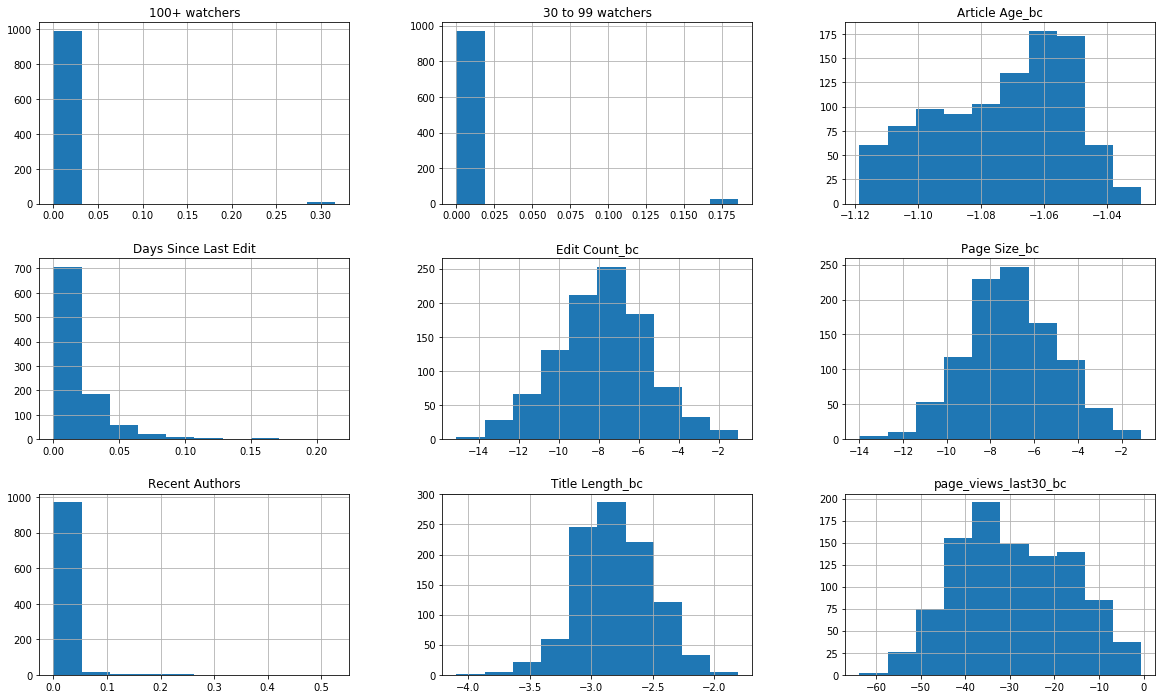

In [19]:
num_only2.hist(figsize = (20,12));

#### Correlations

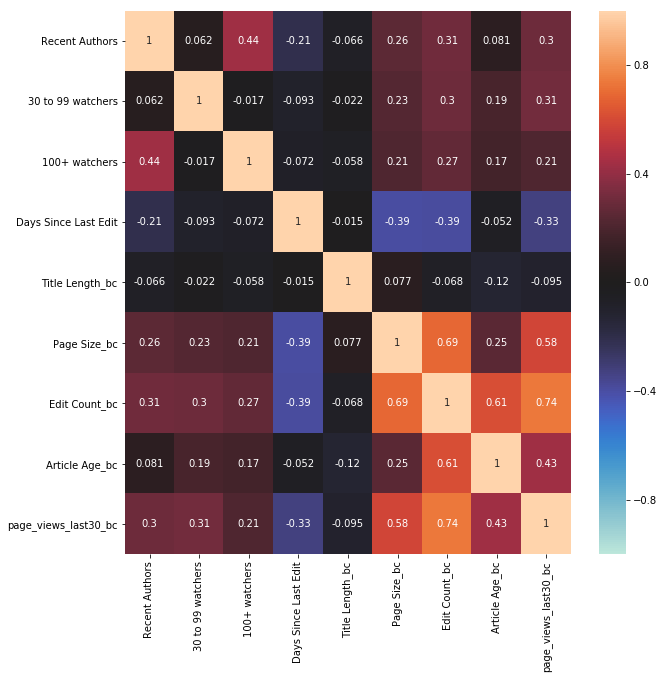

In [20]:
corrs = num_only2.corr()

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
sns.heatmap(corrs,
            vmin = -1,
            vmax = 1,
            center = 0,
            annot = True);

# It looks like page size, edit count, and article age are the strongest correlates!

#### A preliminary model

In [21]:
x = num_only2.iloc[:,:-1]
y = num_only2.iloc[:,-1]

In [22]:
# instantiate our lr object
lr1 = LinearRegression()

# Fit the model to the full dataset
lr1.fit(x, y)

# Print out the R^2 for the model against the full dataset
print("R2 is:",lr1.score(x,y),"- almost 58% of variance in page views is explained by my features\n")
print("In the social sciences, I'd be ecstatic")
print("But let's go deeper")

R2 is: 0.577004084107 - almost 58% of variance in page views is explained by my features

In the social sciences, I'd be ecstatic
But let's go deeper


##### Digging a little deeper...

In [23]:
print("Let's get some more info about our model:")
X = sm.tools.add_constant(x)

model_1 = sm.OLS(y, X)
model_1.fit().summary()
# These stats are too good to be true. Let's go through our assumptions

Let's get some more info about our model:


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     page_views_last30_bc   R-squared:                       0.577
Model:                              OLS   Adj. R-squared:                  0.574
Method:                   Least Squares   F-statistic:                     168.8
Date:                  Thu, 25 Jan 2018   Prob (F-statistic):          4.29e-179
Time:                          20:32:22   Log-Likelihood:                -3510.0
No. Observations:                   999   AIC:                             7038.
Df Residuals:                       990   BIC:                             7082.
Df Model:                             8                                         
Covariance Type:              nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.3605     17.637      0.077      0.939     -33.249      35.970
Recent Authors          32.0884      9.844      3.260      0.001      12.770      51.406
30 to 99 watchers       39.0192      8.752      4.458      0.000      21.844      56.195
100+ watchers           -3.8296      9.329     -0.410      0.682     -22.137      14.478
Days Since Last Edit   -11.9709     11.607     -1.031      0.303     -34.748      10.806
Title Length_bc         -2.4494      0.880     -2.782      0.006      -4.177      -0.722
Page Size_bc             0.8293      0.187      4.445      0.000       0.463       1.195
Edit Count_bc            3.1202      0.217     14.385      0.000       2.695       3.546
Article Age_bc           7.0019     16.753      0.418      0.676     -25.873      39.877
==============================================================================
Omnibus:                        9.723   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.694
Skew:                           0.232   Prob(JB):                      0.00785
Kurtosis:                       3.135   Cond. No.                     1.07e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Feature selection, feature engineering, and more models
Let's see who's better at feature selection: Jon or sklearn

#### Manual feature selection approach

I went about this a few ways:

1. What isn't contributing much to the model?
    - Whether or not an article has 100 or more watchers: let's remove this altogether
    - Days since last edit
    - Article Age
    
2. What's problematic from a conceptual standpoint?
    - Audrey pointed out that, when predicting the number of pageviews for a given 30 day window,    
    I wouldn't also know the number of authors in that window. I didn't have time to make a staggered  
    timeseries, so let's remove this too.
    
3. This leaves us with just:
    - whether an article has at least 30 but less than 100 watchers
    - title length
    - page_size
    - edit count
    
Can we still make a model that explains at least a majority of the variance? I'm less optimistic

In [24]:
# New x and y
x2 = num_only2[["30 to 99 watchers", "Title Length_bc", "Page Size_bc", "Edit Count_bc"]]
y2 = num_only2.iloc[:,-1]

print("Let's get some more info about our model:")
X2 = sm.tools.add_constant(x2)
model_2 = sm.OLS(y2, X2).fit()
model_2.summary()

# we... hardly lost anything? I'm surprised.

Let's get some more info about our model:


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     page_views_last30_bc   R-squared:                       0.571
Model:                              OLS   Adj. R-squared:                  0.570
Method:                   Least Squares   F-statistic:                     331.2
Date:                  Thu, 25 Jan 2018   Prob (F-statistic):          4.02e-181
Time:                          20:32:26   Log-Likelihood:                -3516.6
No. Observations:                   999   AIC:                             7043.
Df Residuals:                       994   BIC:                             7068.
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -4.8382      2.680     -1.805      0.071     -10.098       0.421
30 to 99 watchers    38.0530      8.733      4.358      0.000      20.916      55.190
Title Length_bc      -2.6217      0.881     -2.976      0.003      -4.351      -0.893
Page Size_bc          0.8816      0.177      4.975      0.000       0.534       1.229
Edit Count_bc         3.2981      0.162     20.386      0.000       2.981       3.616
==============================================================================
Omnibus:                       11.034   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.072
Skew:                           0.244   Prob(JB):                      0.00394
Kurtosis:                       3.168   Cond. No.                         380.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Train-Test Split

Ok, let's ratchet it up a notch. Let's see how this model deals with unseen data.  

R-squared is now: 0.597984445696


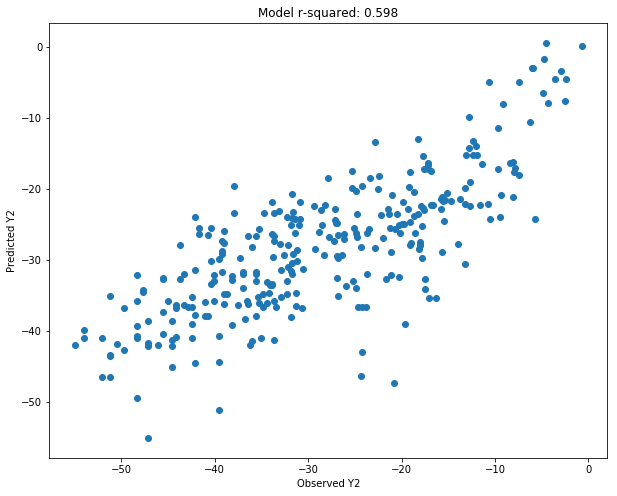

In [182]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3)

lr2 = LinearRegression()
lr2.fit(X2_train, y2_train)
print('R-squared is now:',lr2.score(X2_test, y2_test)) 

# Let's plot:
# lr3 = LinearRegression()
# lr3.fit(X2_train, y2_train)
predictions = lr2.predict(X2_test)

plt.figure(figsize=(10,8))
plt.scatter(y2_test, predictions)

plt.xlabel("Observed Y2")
plt.ylabel("Predicted Y2")

plt.title(f"Model r-squared: {round(lr2.score(X2_test, y2_test),3)}");

#### Polynomial features pipeline

We are overfitting after x degrees, but polynomials don't do much anyway!


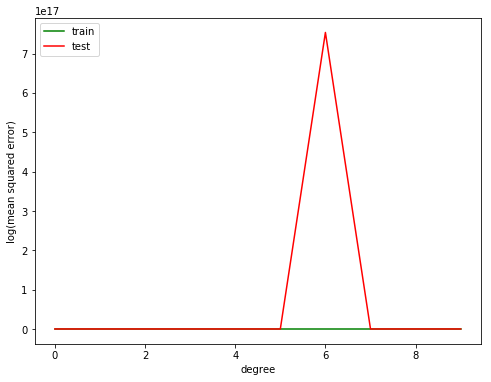

In [26]:
# Step through degrees from 0 to 9 and store the training and test (generalization) error.
# create array of zeros,
train_error = np.empty(10)
test_error = np.empty(10)

for degree in range(10):
    est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    est.fit(X2_train, y2_train)
    train_error[degree] = mean_squared_error(y2_train, est.predict(X2_train))
    test_error[degree] = mean_squared_error(y2_test, est.predict(X2_test))

# Plot the training and test errors against degree
plt.figure(figsize=(8,6))
plt.plot(np.arange(10), train_error, color='green', label='train')
plt.plot(np.arange(10), test_error, color='red', label='test')
# plt.ylim((0.0, 1e0))
plt.ylabel('log(mean squared error)')
plt.xlabel('degree')
plt.legend(loc='upper left');

warnings.filterwarnings("ignore")

print("We are overfitting after x degrees, but polynomials don't do much anyway!")

#### 10-fold cross-validation

In [168]:
lr3 = LinearRegression()
scores = cross_val_score(lr3, X2, y2, cv=10, scoring='r2')
print(np.mean(scores),"cool") 

0.565933333331 cool


#### Cross-validation with Lasso Regularization
Time to really pump it up!

In [28]:
from sklearn.linear_model import LassoCV

In [173]:
lcv = LassoCV(cv=10)
lcv.fit(X2, y2)
lcv.score(X2_test,y2_test)

0.56681620211984773

Lasso regularization and cross-validation really didn't do anything for me. Let's come back down into the realm of interpretability.

### Assumption Testing

#### Assumption One: Plotting Residuals

These are the normalized values. Should I have done them with the non-normalized values?


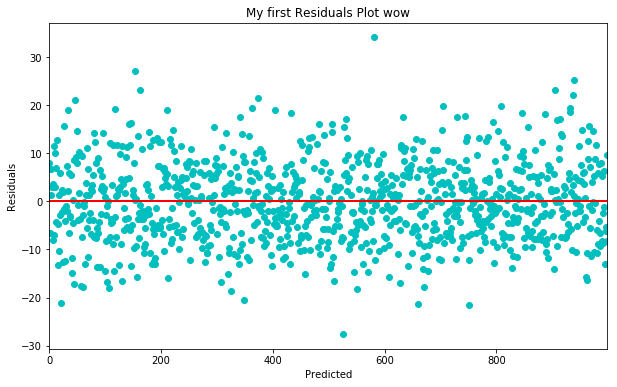

In [184]:
# What does this mean?
# going back to model_2.fit() - see 1.6 "Feature selection..."
model_2.resid.plot(style='co', figsize=(10,6));
plt.title("My first Residuals Plot wow")
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(0,color='red',linewidth=2);

print('These are the normalized values. Should I have done them with the non-normalized values?')

IS THIS SHOWING ME SOMETHING DIFFERENT THAN THE ABOVE???


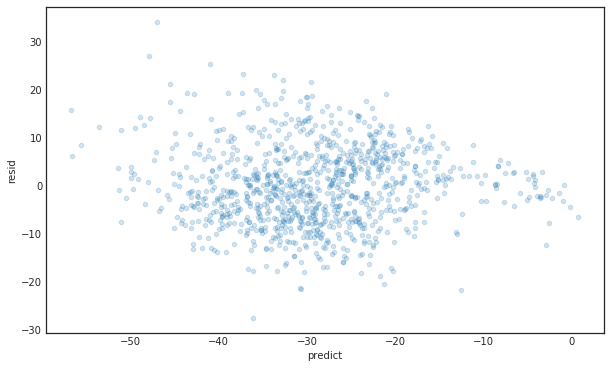

In [183]:
# Another approach
lr3 = LinearRegression()
model_3 = lr3.fit(x2,y2)

final_frame = x2.join(y2)

final_frame['predict'] = model_3.predict(x2)
final_frame['resid'] = final_frame.page_views_last30_bc - final_frame.predict

with sns.axes_style('white'):
    plot=final_frame.plot(kind='scatter',
                  x='predict',y='resid',alpha=0.2,figsize=(10,6))
    
print('''IS THIS SHOWING ME SOMETHING DIFFERENT THAN THE ABOVE???''')

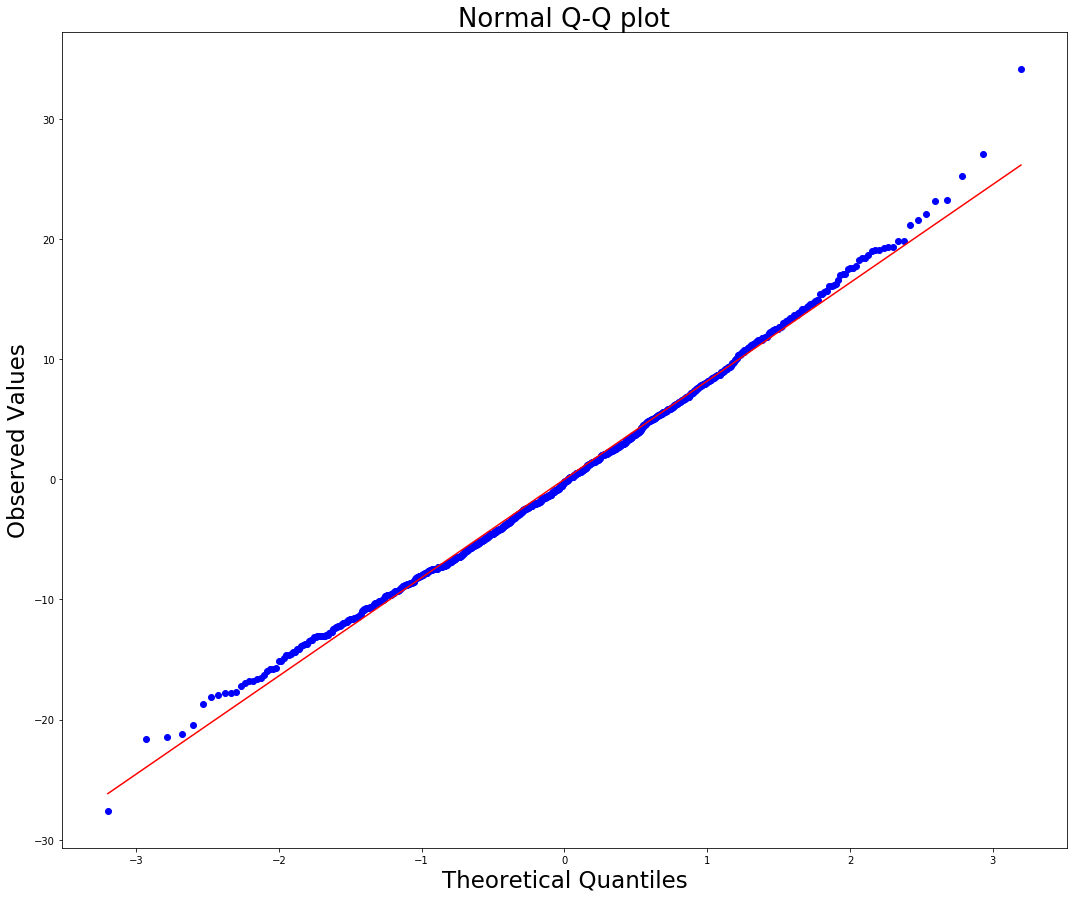

In [193]:
# We can diagnose/ inspect our residual normality assumption using qqplot:

plt.figure(figsize = (18,15))
stats.probplot(final_frame['resid'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot", {'fontsize' : 26 })
plt.xlabel("Theoretical Quantiles", {'fontsize' : 23 })
plt.ylabel("Observed Values", {'fontsize' : 23 })
plt.show()

#### Other assumptions:

The only thing that predicts the residuals are the observed values and themselves
Additionally, no features are wholly covarying - edit count and page size have r=.69


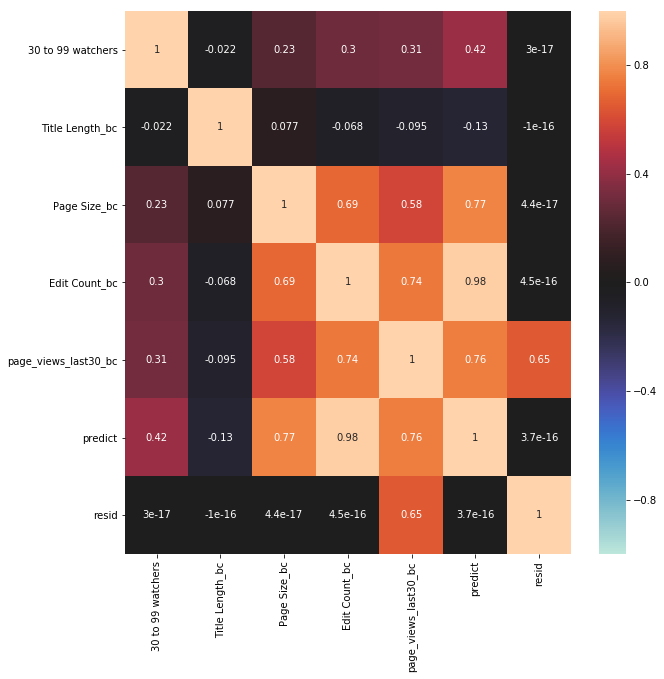

In [186]:
corrs = final_frame.corr()

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
sns.heatmap(corrs,
            vmin = -1,
            vmax = 1,
            center = 0,
            annot = True);

print("The only thing that predicts the residuals are the observed values and themselves")
print("Additionally, no features are wholly covarying - edit count and page size have r=.69")

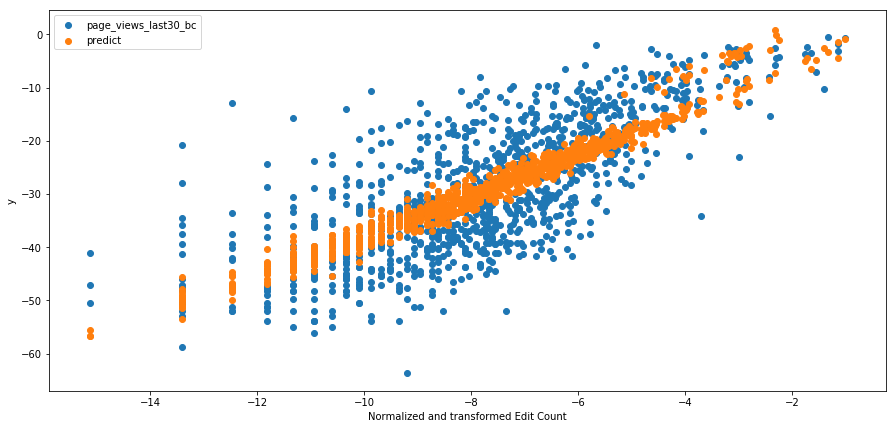

In [76]:
# quick reg plot

plt.figure(figsize = (15,7))

plt.xlabel("Normalized and transformed Edit Count")
plt.ylabel("y")
plt.scatter(final_frame["Edit Count_bc"],final_frame["page_views_last30_bc"])
plt.scatter(final_frame["Edit Count_bc"],final_frame.predict)
plt.legend();

### Appendix: Graveyard of failed creations

#### Plotting

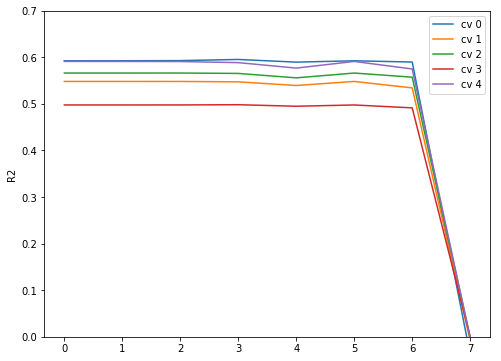

In [101]:
def findBestAlpha(x, y):
    # function courtesy of Kevin
    kf = KFold(len(x), n_folds = 5, shuffle = True)
    
    all_scores=[]
    alphas=[1e-5,1e-4,1e-3,1e-2,1e-1,0,1,100]
    
    for train, test in kf:
        x_train=x.iloc[train]
        y_train=y.iloc[train]
        x_test=x.iloc[test]
        y_test=y.iloc[test]
        mse_score=[]
        r2 = []
        for a in alphas:
            est = make_pipeline(PolynomialFeatures(1), Lasso(alpha=a))
            est.fit(x_train,y_train)
            mse=np.mean((y_test-est.predict(x_test))**2)
            mse_score.append(mse)
            r2.append(est.score(x_test,y_test))
            
        all_scores.append(r2)
    
    plt.figure(figsize=(8,6))
    plt.ylim(0,0.7)
    plt.legend()
    for i in range(5):
        plt.plot(all_scores[i],label = 'cv %s'%i)

    plt.legend()
    plt.ylabel('R2')
    plt.show()

findBestAlpha(X2_train,y2_train)

In [ ]:
####USING GRID SEARCH TO FIND THE BEST ALPHA/SCORE/COEFFICIENTS
def lassoCoef(x,y):
    alphas=[1e-5,1e-4,1e-3,1e-2,1e-1,0,1,100]
    # create and fit a Lasso regression model, testing each alpha
    model = Lasso()
    grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas), cv = 5)
    grid.fit(x,y)
    #print(grid)
    # summarize the results of the grid search
    score = grid.best_score_
    alpha = grid.best_estimator_.alpha
    #print(grid.best_estimator_.coef_)
    zipped = zip(x.columns, grid.best_estimator_.coef_)
    features = sorted(zipped, key = lambda t: t[1], reverse = True)
    return [score, alpha, features]

lassoCoef(X2,y2)